# Parkinson's disease prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parkinson_data=pd.read_csv("C:/Users/lenovo/Downloads/pd_speech_features.csv")

In [3]:
parkinson_data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
parkinson_data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# data processing

In [6]:
parkinson_data.shape

(756, 755)

In [7]:
parkinson_data.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [8]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [9]:
parkinson_data.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [11]:
howmanyman=parkinson_data.gender.sum()
total=parkinson_data.gender.count()
howmanywoman=total-howmanyman
print("man: "+str(howmanyman)+" woman: "+str(howmanywoman))

man: 390 woman: 366


In [17]:
labels=parkinson_data.iloc[:, 0].values
features=parkinson_data.iloc[:, 1:].values

In [18]:
print(features.shape)
print(labels[0])

(756, 754)
0


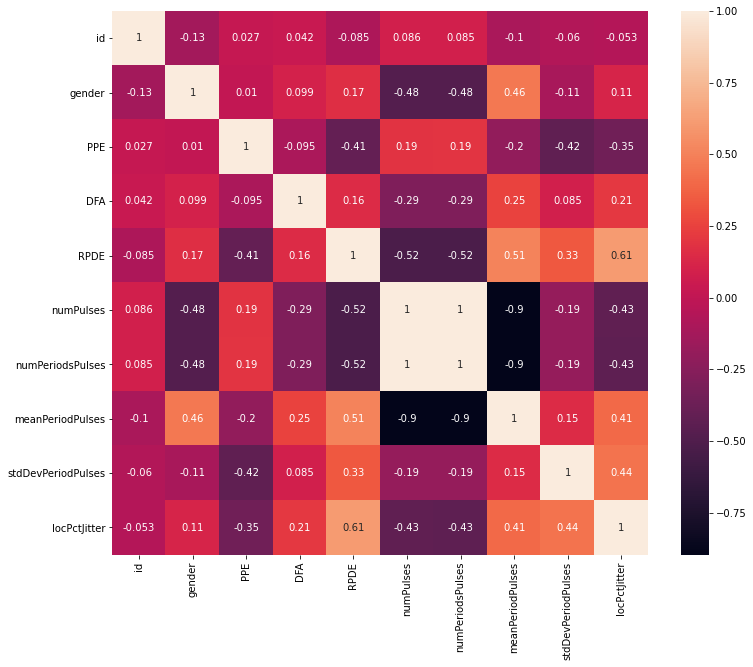

In [7]:
# To create some correlation heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(parkinson_data[parkinson_data.columns[0:10]].corr(),annot=True)

# scale data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
scaled_features=scaler.fit_transform(features)

# Splitting the data into train and test data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,labels,test_size=0.3)

In [38]:
print("x_train shape-> {}".format(x_train.shape))
print("y_train shape-> {}".format(y_train.shape))
print("x_test shape-> {}".format(x_test.shape))
print("y_test shape-> {}".format(x_test.shape))

x_train shape-> (529, 754)
y_train shape-> (529,)
x_test shape-> (227, 754)
y_test shape-> (227, 754)


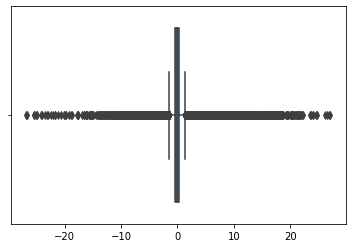

In [39]:
sns.boxplot(scaled_features)

# prediction

# Linear regression

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [40]:
mod=LinearRegression()

In [41]:
mod.fit(x_train,y_train)

LinearRegression()

In [42]:
mod.intercept_

139.00666457159133

In [43]:
mod.coef_

array([-3.71252555e+01, -4.17712970e+00,  3.83003764e+01, -4.41734360e+01,
       -1.90854184e+01, -2.98093239e+01, -3.43114912e+01, -2.77174373e+01,
        9.69950577e+01, -8.47314298e+01,  1.01070285e+01, -2.92495758e+00,
        6.57775482e+00, -1.01159911e+02, -1.98938806e+01,  3.18411001e+01,
        3.84759538e+01,  2.04859487e+01,  3.19276366e+01, -6.36025788e+01,
       -7.02243571e+01, -3.32932957e+01,  8.00960385e+01, -1.54752577e+02,
        6.30800444e+01, -5.08181353e+01,  4.82491786e+00,  2.59347057e+01,
       -8.99954555e+00,  3.97322681e+00,  7.02880968e+00, -5.24684153e+00,
        4.35379733e+00,  1.52863955e+01,  6.97352070e-01,  3.92490746e+00,
       -2.88164372e+01,  1.34598280e+01, -7.04246646e+01,  9.60491239e+00,
        6.93753349e+01,  5.48872222e+00, -8.81139149e+01,  2.41938025e-01,
        1.15497583e+02, -1.34937142e+01, -1.22667149e+00,  2.21340966e+01,
       -3.98996960e+00,  1.67005353e+01,  3.39454970e+01, -6.57855906e+01,
       -1.64239577e+02,  

In [44]:
from sklearn.metrics import r2_score

In [45]:
y_train_predict=mod.predict(x_train)

In [46]:
r2_score(y_train,y_train_predict)    #r2_score  refers to the coefficient of determination

1.0

In [47]:
#KNN neighbour algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
print("KNN with k=5 got{}% accuracy on the set.".format(accuracy_score(y_test,knn.predict(x_test))*100))

KNN with k=5 got28.193832599118945% accuracy on the set.


# Classifiction on Random forest

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
y=parkinson_data["class"]
x=parkinson_data.iloc[:,0:747]
xnew2=SelectKBest(f_classif, k=20).fit_transform(x, y)

In [59]:
X=pd.DataFrame(xnew2)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.4874,0.028115,0.014642,0.019681,0.012829,0.021703,4.8840,-229943.2967,-201985.0408,0.000059,0.005199,0.004324,0.013373,-0.026321,-0.024286,-0.048924,0.022796,0.024286,0.048924,1.5466
1,2.8986,0.022166,0.025500,0.019374,0.010645,0.020296,4.8483,-230526.8175,-203389.4678,0.000169,0.005221,0.004344,0.011184,-0.070039,-0.099695,-0.112210,0.080975,0.099695,0.112210,1.5530
2,3.2208,0.032326,0.024607,0.024819,0.016553,0.023186,1.9849,-246592.6024,-214707.2576,0.000021,0.003136,0.002657,0.008093,-0.019435,-0.026241,-0.039886,0.013810,0.026241,0.039886,1.5399
3,3.1023,0.032577,0.017274,0.016129,0.015533,0.011976,3.2053,-255107.4287,-160775.5650,0.000493,0.004537,0.016104,0.051620,-0.121640,-0.129990,-0.268930,0.111290,0.122970,0.273530,6.9761
4,2.9451,0.031989,0.013791,0.016059,0.014382,0.012686,2.7170,-252647.9964,-154087.6641,0.000328,0.003931,0.015422,0.051298,-0.078138,-0.115900,-0.227210,0.086621,0.102950,0.235860,7.8832


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=43421)
rdclass=RandomForestClassifier()
rdclass.fit(x_train,y_train)
ypred=rdclass.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

[[ 24  21]
 [  4 140]]
0.8677248677248677
